# SETUP E DATA ANALYSIS


In [ ]:
#collegamento al Drive
!pip install gdrive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#scaricamento dati
!wget https://zenodo.org/record/6606557/files/computer_science.zip?download=1
!unzip /content/computer_science.zip?download=1

In [ ]:
# spostamento dati su Drive
import os
import shutil
os.makedirs('/content/drive/My Drive/Progetto_Information_Retrieval', exist_ok= True)
shutil.move('computer_science', '/content/drive/My Drive/Progetto_Information_Retrieval/computer_science')

In [ ]:
!pip install jsonlines
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import json
import jsonlines

In [ ]:
#creo df dei documenti
titles = []
ids = []
texts = []

counter = 0
with jsonlines.open('/content/drive/MyDrive/Progetto_Information_Retrieval/computer_science/collection.jsonl') as reader:
    for obj in reader:
        if counter >= 100000:
            break
#cerco i campi che mi interessano 
        title_value = obj["title"]
        id_value = obj["id"]
        text_value = obj["text"]
#aggiungo alla lista i campi che mi interessano
        titles.append(title_value)
        ids.append(id_value)
        texts.append(text_value)
        counter += 1

df = pd.DataFrame({"id": ids, "title": titles, "text" : texts})

In [ ]:
df

,id,title,text
0,1966540759,Characterization of non-linear profiles variat...,There is an increasing research interest in th...
1,1966540888,MicroRadarNet: A network of weather micro rada...,"Abstract In this paper, MicroRadarNet, a novel..."
2,1966540900,Partial Evaluation for Distributed XPath Query...,This article proposes algorithms for evaluatin...
3,1966540911,Hollow golf club head modal characteristics: D...,The design of modern hollow golf club heads is...
4,1966540996,Multiplicative interactions to enhance gabapen...,Abstract We previously reported that gabapenti...
...,...,...,...
99995,2059893919,Discriminability metric based on human contras...,We evaluated a metric for predicting the discr...
99996,2059893970,CHANGES IN FRIENDSHIP STATUS AS A FUNCTION OF ...,48 preschool Ss (mean age = 58 months) were pa...
99997,2059894102,Flexible Modeling of Dependence in Volatility ...,This article proposes a novel stochastic volat...
99998,2101297579,Spatial Inference Machines,This paper addresses the problem of semantic s...


In [ ]:
#visualizzazione iniziale del df dei documenti
print("Document dataframe info:")
print(df.info())

Document dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809684 entries, 0 to 4809683
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      object
 1   title   object
 2   text    object
dtypes: object(3)
memory usage: 110.1+ MB
None


In [ ]:
print("Document dataframe description:")
df.describe

Document dataframe description:


<bound method NDFrame.describe of                  id                                              title  \
0        1966540759  Characterization of non-linear profiles variat...   
1        1966540888  MicroRadarNet: A network of weather micro rada...   
2        1966540900  Partial Evaluation for Distributed XPath Query...   
3        1966540911  Hollow golf club head modal characteristics: D...   
4        1966540996  Multiplicative interactions to enhance gabapen...   
...             ...                                                ...   
4809679  2797668911  A Decisive Predictive Approach to the Construc...   
4809680  2797677345  Aircraft/missile central navigation system hav...   
4809681  2797677446  Deflection circuit for non-standard signal source   
4809682  2797686479  MUSICAL COMPOSITION SUPPORTING DEVICE, MUSICAL...   
4809683  2797689176                              Uniform Shell Designs   

                                                      text  
0        There i

In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 4809684 rows and 3 columns


In [ ]:
df.head(10)

,id,title,text
0,1966540759,Characterization of non-linear profiles variat...,There is an increasing research interest in th...
1,1966540888,MicroRadarNet: A network of weather micro rada...,"Abstract In this paper, MicroRadarNet, a novel..."
2,1966540900,Partial Evaluation for Distributed XPath Query...,This article proposes algorithms for evaluatin...
3,1966540911,Hollow golf club head modal characteristics: D...,The design of modern hollow golf club heads is...
4,1966540996,Multiplicative interactions to enhance gabapen...,Abstract We previously reported that gabapenti...
5,1966541018,Financial Service Strategies: Neglected Niches,Companies cannot realize their growth and prof...
6,1966541030,Perceptual non‐intrusive speech quality assess...,Purpose – This paper seeks to propose a new no...
7,1966541223,The multifrequency angular power spectrum of t...,Observations of redshifted 21cm radiation from...
8,1966541245,"Concurrency by modularity: design patterns, a ...",General purpose object-oriented programs typic...
9,1966541294,Democracy and Transparency,Are democracies more transparent than other ty...


In [ ]:
#creo df delle query
ids = []
texts = []

with jsonlines.open('/content/drive/MyDrive/Progetto_Information_Retrieval/computer_science/train/queries.jsonl') as reader:
    for obj in reader:
#cerco i campi che mi interessano 
        id_value = obj["id"]
        text_value = obj["text"]
#aggiungo alla lista i campi che mi interessano
        ids.append(id_value)
        texts.append(text_value)

dfquery = pd.DataFrame({"qid": ids, "query" : texts})

In [ ]:
dfquery

,qid,query
0,2477357073,survey application layer protocol internet things
1,589973208,interference alignment game theoretical power ...
2,2150088023,reliable wireless broadcast random network cod...
3,2161089462,investigate tourist pattern obligation protect...
4,2157836986,automatic inference structural change matching...
...,...,...
552793,2104456054,maintenance policy selection manufacture firm ...
552794,2145299863,closed form solution attitude speed determinat...
552795,2070792843,artificial language learning feature base gene...
552796,1968248541,poster mimicry attack wireless link signature


In [ ]:
#visualizzazione iniziale del df delle query
print("Query dataframe info:")
print(dfquery.info())

Query dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552798 entries, 0 to 552797
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   qid     552798 non-null  object
 1   query   552798 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB
None


In [ ]:
print("Document dataframe description:")
dfquery.describe

Document dataframe description:


<bound method NDFrame.describe of                qid                                              query
0       2477357073  survey application layer protocol internet things
1        589973208  interference alignment game theoretical power ...
2       2150088023  reliable wireless broadcast random network cod...
3       2161089462  investigate tourist pattern obligation protect...
4       2157836986  automatic inference structural change matching...
...            ...                                                ...
552793  2104456054  maintenance policy selection manufacture firm ...
552794  2145299863  closed form solution attitude speed determinat...
552795  2070792843  artificial language learning feature base gene...
552796  1968248541      poster mimicry attack wireless link signature
552797  2136146882  software cost model quantify gain consideratio...

[552798 rows x 2 columns]>

In [ ]:
nRow, nCol = dfquery.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 552798 rows and 2 columns


In [ ]:
dfquery.head(10)

,qid,query
0,2477357073,survey application layer protocol internet things
1,589973208,interference alignment game theoretical power ...
2,2150088023,reliable wireless broadcast random network cod...
3,2161089462,investigate tourist pattern obligation protect...
4,2157836986,automatic inference structural change matching...
5,1973242626,cysbgn cytoscape plug integrate sbgn map
6,1966831001,review articleeditor choice article comparison...
7,1568680666,coherence enhance shock filter
8,2149531814,high dimension statistic measure region intere...
9,2131244103,enhance performance geography distribute team ...


# PREPROCESSING DEI DOCUMENTI




Non sono stati rimossi whitespaces, caratteri ripetuti, emoji e correzioni di spelling in quanto gli articoli accademici tendenzialmente non sono soggetti a questi tipi di errore

In [ ]:
import nltk
from tqdm import tqdm
import re
from nltk.tokenize import word_tokenize

In [ ]:
def decontracted(phrase):
    # specifiche forme contratte
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # generali
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

In [ ]:
preprocessed_title = []
for sentance in tqdm(df['title'].values):
  #lower case
  sentance=sentance.lower()
  #decontracted
  sentance = decontracted(sentance)
  #rimuovo numeri e punteggiatura
  sentance = re.sub("\S*\d\S*", "", sentance).strip()
  #rimuovo caratteri diversi da quelli di testo
  sentance = re.sub('[^A-Za-z]+', ' ', sentance)
  preprocessed_title.append(sentance.strip())

100%|██████████| 100000/100000 [00:02<00:00, 38458.32it/s]


In [ ]:
preprocessed_text = []
for sentance in tqdm(df['text'].values):
  #lower case
  sentance=sentance.lower()
  #decontracted
  sentance = decontracted(sentance)
  #links
  sentance = re.sub(r"http\S+", "", sentance)
  #rimuovo numeri e punteggiatura
  sentance = re.sub("\S*\d\S*", "", sentance).strip()
  #rimuovo caratteri diversi da quelli di testo
  sentance = re.sub('[^A-Za-z]+', ' ', sentance)
  preprocessed_text.append(sentance.strip())

100%|██████████| 100000/100000 [00:26<00:00, 3769.85it/s]


In [ ]:
#inserisco nel dataframe i dati preprocessati
df['clean_title']=preprocessed_title
df['clean_text']=preprocessed_text

**TOKENIZATION**

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#tokenize di clean title e text
df["title_tokens"] = df["clean_title"].apply(word_tokenize)
df["text_tokens"] = df["clean_text"].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#numero medio di token per titolo e testo
print("Numero medio di token per titolo")
print(df['title_tokens'].apply(lambda x: len(x)).mean())

print("Numero medio di token per testo")
print(df['text_tokens'].apply(lambda x: len(x)).mean())

Numero medio di token per titolo
10.43532
Numero medio di token per testo
146.1561


In [ ]:
#rimozione stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_list = stopwords.words("english")
df["stop_tok_title"] = df["title_tokens"].apply(lambda x: [word for word in x if word.lower() not in stopwords_list])
df["stop_tok_text"] = df["text_tokens"].apply(lambda x: [word for word in x if word.lower() not in stopwords_list])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.collections import Counter
#metodo per vedere le parole più usate
def get_counter(series):
  flat_list = [item for sublist in series for item in sublist]
  c = Counter(flat_list)
  return c


In [ ]:
#vedo quali sono le top 10 parole dei vari tokenized title per vedere i miglioramenti
print("Most used terms for document's title:")
get_counter(df["title_tokens"]).most_common(10)

Most used terms for document's title:


[('of', 46834),
 ('and', 37914),
 ('for', 34130),
 ('a', 27790),
 ('in', 26007),
 ('the', 25330),
 ('on', 10932),
 ('based', 9634),
 ('to', 9613),
 ('with', 9386)]

In [ ]:
print("Most used terms for document's title after removing stopwords:")
get_counter(df["stop_tok_title"]).most_common(10)

Most used terms for document's title after removing stopwords:


[('based', 9634),
 ('using', 8475),
 ('system', 8425),
 ('method', 8328),
 ('data', 5933),
 ('analysis', 5262),
 ('systems', 4841),
 ('networks', 4195),
 ('model', 3847),
 ('network', 3705)]

In [ ]:
#vedo quali sono le top 10 parole dei vari tokenized title per vedere i miglioramenti
print("Most used terms for document's text:")
get_counter(df["text_tokens"]).most_common(10)

Most used terms for document's text:


[('the', 985273),
 ('of', 594870),
 ('and', 439917),
 ('a', 410712),
 ('to', 354609),
 ('in', 306028),
 ('is', 226640),
 ('for', 186278),
 ('that', 130300),
 ('with', 113869)]

In [ ]:
print("Most used terms for document's text after removing stopwords:")
get_counter(df["stop_tok_text"]).most_common(10)

Most used terms for document's text after removing stopwords:


[('data', 67011),
 ('based', 51309),
 ('system', 49107),
 ('paper', 41458),
 ('model', 39349),
 ('method', 38320),
 ('using', 38248),
 ('results', 36883),
 ('time', 35340),
 ('information', 35337)]

**LEMMATISATION**

In [ ]:
#applico lemmatizzazione utilizzando wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

wnlem = WordNetLemmatizer()
df["stop_title_wnlem"] = df["stop_tok_title"].apply(lambda x: [wnlem.lemmatize(word) for word in x])
df["stop_text_wnlem"] = df["stop_tok_text"].apply(lambda x: [wnlem.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#verifico risultati del lemming
print("Most used terms for document's title after lemmatisation:")
get_counter(df["stop_title_wnlem"]).most_common(10)

Most used terms for document's title after lemmatisation:


[('system', 13266),
 ('method', 10186),
 ('based', 9634),
 ('using', 8475),
 ('network', 7900),
 ('data', 5933),
 ('model', 5765),
 ('analysis', 5398),
 ('image', 4052),
 ('algorithm', 3815)]

In [ ]:
#verifico risultati del lemming
print("Most used terms for document's text after lemmatisation:")
get_counter(df["stop_text_wnlem"]).most_common(10)

Most used terms for document's text after lemmatisation:


[('system', 72158),
 ('data', 67014),
 ('method', 56744),
 ('model', 56371),
 ('based', 51309),
 ('result', 43373),
 ('paper', 42325),
 ('time', 39169),
 ('using', 38248),
 ('network', 38176)]

In [ ]:
#numero medio di token per testo
print("Numero medio di token per titolo dopo il preprocessing")
print(df['stop_title_wnlem'].apply(lambda x: len(x)).mean())
print("Numero medio di token per testo dopo il preprocessing")
print(df['stop_text_wnlem'].apply(lambda x: len(x)).mean())

Numero medio di token per titolo dopo il preprocessing
7.80516
Numero medio di token per testo dopo il preprocessing
89.50897


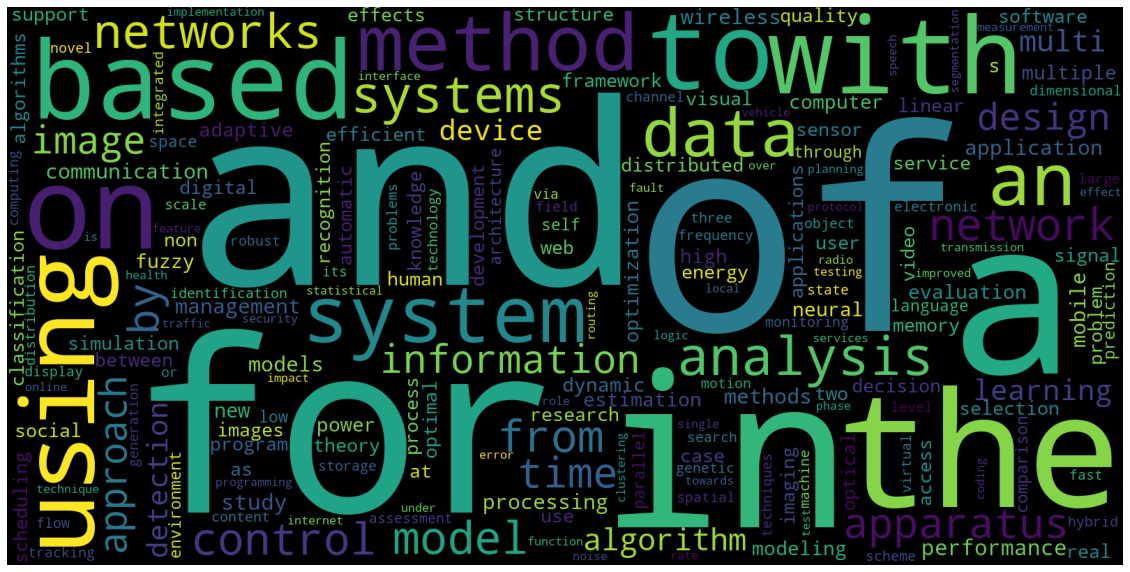

In [ ]:
#visualizzo la situazione iniziale dei titoli prima di applicare stopwords e lemming
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

from wordcloud import WordCloud

flat_list = [item for sublist in df["title_tokens"] for item in sublist] #lista contenente i token 
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black", max_font_size= 400).generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

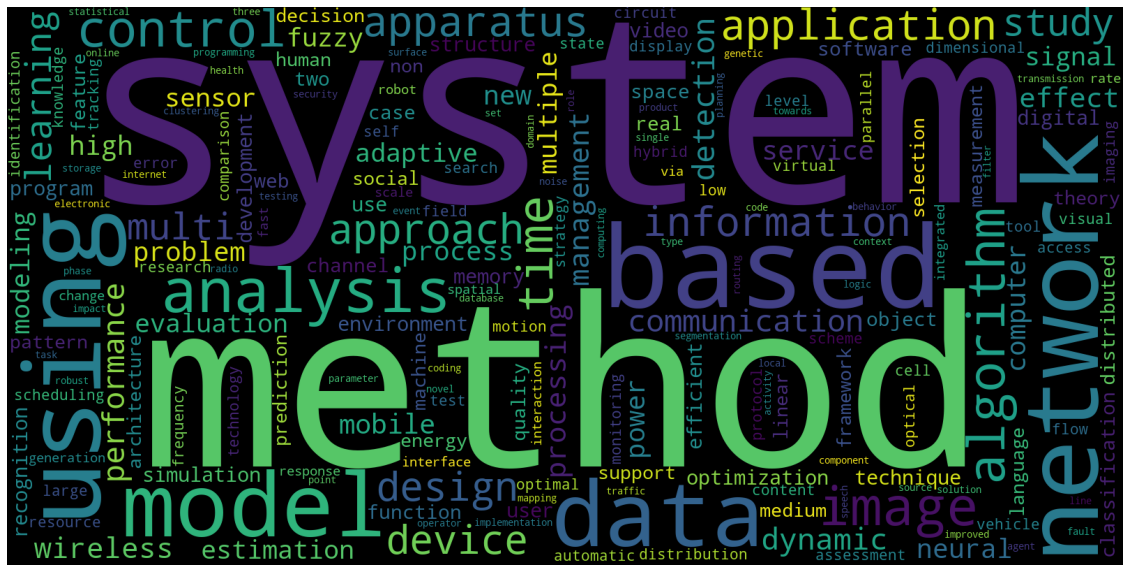

In [ ]:
#visualizzo i risultati ottenuti dei titoli dopo tutto il preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

from wordcloud import WordCloud

flat_list = [item for sublist in df["stop_title_wnlem"] for item in sublist] #lista contenente i token 
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

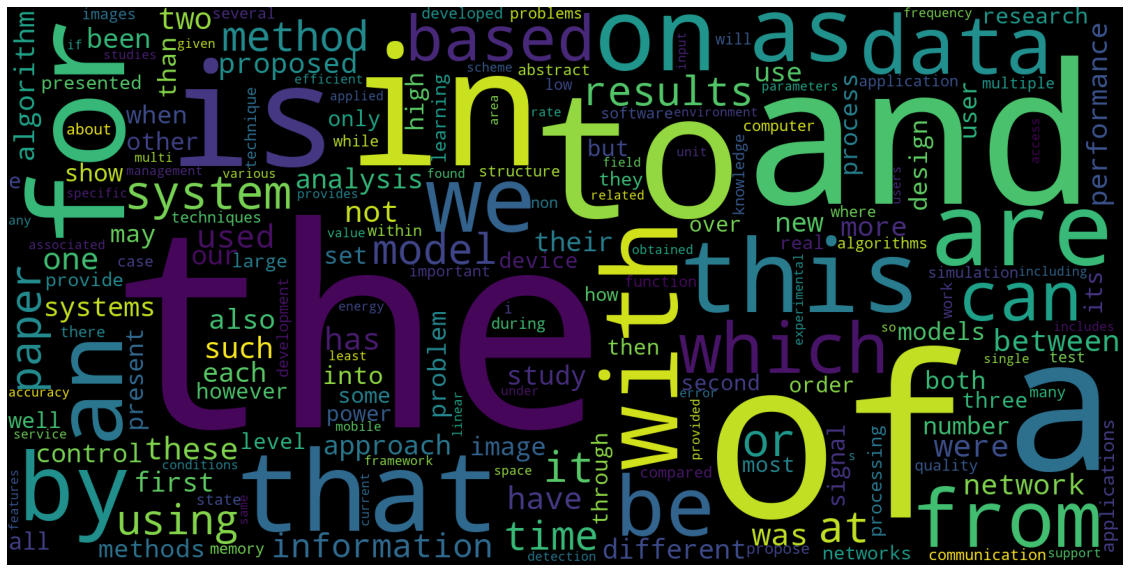

In [ ]:
#visualizzo la situazione iniziale dei testi prima di applicare stopwords e lemming
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

from wordcloud import WordCloud

flat_list = [item for sublist in df["text_tokens"] for item in sublist] #lista contenente i token 
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black", max_font_size= 400).generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

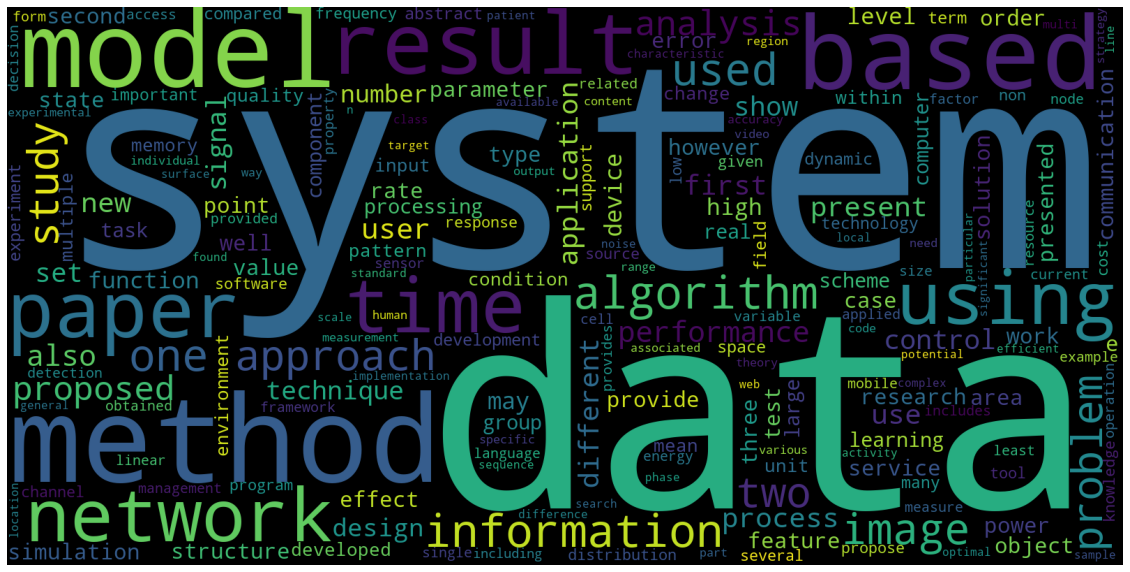

In [ ]:
#visualizzo i risultati ottenuti dei testi dopo tutta la fase di preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

from wordcloud import WordCloud

flat_list = [item for sublist in df["stop_text_wnlem"] for item in sublist] #lista contenente i token 
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

In [ ]:
#elimino colonne inutilizzate e riconduco token a testo
df.drop("title_tokens", axis=1, inplace=True)
df.drop("text_tokens", axis=1, inplace=True)
df['stop_text'] = df['stop_tok_text'].apply(lambda x: ' '.join(x))
df['stop_title'] = df['stop_tok_title'].apply(lambda x: ' '.join(x))
df['wnlem_title'] = df['stop_title_wnlem'].apply(lambda x: ' '.join(x))
df['wnlem_text'] =  df['stop_text_wnlem'].apply(lambda x: ' '.join(x))
df.drop('stop_tok_text', axis=1, inplace=True)
df.drop('stop_tok_title', axis=1, inplace=True)
df.drop('stop_text_wnlem', axis=1, inplace=True)
df.drop('stop_title_wnlem', axis=1, inplace=True)

In [ ]:
df

,id,title,text,clean_title,clean_text,stop_text,stop_title,wnlem_title,wnlem_text
0,1966540759,Characterization of non-linear profiles variat...,There is an increasing research interest in th...,characterization of non linear profiles variat...,there is an increasing research interest in th...,increasing research interest modeling analysis...,characterization non linear profiles variation...,characterization non linear profile variation ...,increasing research interest modeling analysis...
1,1966540888,MicroRadarNet: A network of weather micro rada...,"Abstract In this paper, MicroRadarNet, a novel...",microradarnet a network of weather micro radar...,abstract in this paper microradarnet a novel m...,abstract paper microradarnet novel micro radar...,microradarnet network weather micro radars ide...,microradarnet network weather micro radar iden...,abstract paper microradarnet novel micro radar...
2,1966540900,Partial Evaluation for Distributed XPath Query...,This article proposes algorithms for evaluatin...,partial evaluation for distributed xpath query...,this article proposes algorithms for evaluatin...,article proposes algorithms evaluating xpath q...,partial evaluation distributed xpath query pro...,partial evaluation distributed xpath query pro...,article proposes algorithm evaluating xpath qu...
3,1966540911,Hollow golf club head modal characteristics: D...,The design of modern hollow golf club heads is...,hollow golf club head modal characteristics de...,the design of modern hollow golf club heads is...,design modern hollow golf club heads labor int...,hollow golf club head modal characteristics de...,hollow golf club head modal characteristic det...,design modern hollow golf club head labor inte...
4,1966540996,Multiplicative interactions to enhance gabapen...,Abstract We previously reported that gabapenti...,multiplicative interactions to enhance gabapen...,abstract we previously reported that gabapenti...,abstract previously reported gabapentin activa...,multiplicative interactions enhance gabapentin...,multiplicative interaction enhance gabapentin ...,abstract previously reported gabapentin activa...
...,...,...,...,...,...,...,...,...,...
99995,2059893919,Discriminability metric based on human contras...,We evaluated a metric for predicting the discr...,discriminability metric based on human contras...,we evaluated a metric for predicting the discr...,evaluated metric predicting discriminability d...,discriminability metric based human contrast s...,discriminability metric based human contrast s...,evaluated metric predicting discriminability d...
99996,2059893970,CHANGES IN FRIENDSHIP STATUS AS A FUNCTION OF ...,48 preschool Ss (mean age = 58 months) were pa...,changes in friendship status as a function of ...,preschool ss mean age months were paired as mu...,preschool ss mean age months paired mutually n...,changes friendship status function reinforcement,change friendship status function reinforcement,preschool s mean age month paired mutually neu...
99997,2059894102,Flexible Modeling of Dependence in Volatility ...,This article proposes a novel stochastic volat...,flexible modeling of dependence in volatility ...,this article proposes a novel stochastic volat...,article proposes novel stochastic volatility s...,flexible modeling dependence volatility processes,flexible modeling dependence volatility process,article proposes novel stochastic volatility s...
99998,2101297579,Spatial Inference Machines,This paper addresses the problem of semantic s...,spatial inference machines,this paper addresses the problem of semantic s...,paper addresses problem semantic segmentation ...,spatial inference machines,spatial inference machine,paper address problem semantic segmentation po...


# PREPROCESSING DELLE QUERY



In [ ]:
#sistemo le query
from tqdm import tqdm

preprocessed_query = []
for sentance in tqdm(dfquery['query'].values):
  #lower case
  sentance=sentance.lower()
  #rimuovo numeri e punteggiatura
  sentance = re.sub("\S*\d\S*", "", sentance).strip()
  
  sentance = re.sub('[^A-Za-z]+', ' ', sentance)
  preprocessed_query.append(sentance.strip())

100%|██████████| 552798/552798 [00:08<00:00, 62336.22it/s]


In [ ]:
#inserisco nel dataframe i dati preprocessati
dfquery['clean_query']=preprocessed_query

**TOKENIZATION**

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#tokenize di clean query
dfquery["query_tokens"] = dfquery["clean_query"].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#numero medio di token per query
print("Numero medio di token per query")
print(dfquery['query_tokens'].apply(lambda x: len(x)).mean())

Numero medio di token per query
7.929712119074237


In [ ]:
#vedo quali sono le top 10 parole dei vari tokenized query
print("Most used terms for query text:")
get_counter(dfquery["query_tokens"]).most_common(10)

Most used terms for query text:


[('base', 69773),
 ('system', 62047),
 ('network', 60634),
 ('use', 59909),
 ('model', 48439),
 ('method', 36436),
 ('data', 32796),
 ('image', 29889),
 ('analysis', 28882),
 ('algorithm', 25644)]

In [ ]:
#rimozione stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_list = stopwords.words("english")
dfquery["stop_tok_query"] = dfquery["query_tokens"].apply(lambda x: [word for word in x if word.lower() not in stopwords_list])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**LEMMATISATION**

In [ ]:
#applico lemmatizzazione utilizzando wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

wnlem = WordNetLemmatizer()
dfquery["stop_query_wnlem"] = dfquery["stop_tok_query"].apply(lambda x: [wnlem.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#numero medio di token per query
print("Numero medio di token per query")
print(dfquery['stop_query_wnlem'].apply(lambda x: len(x)).mean())

Numero medio di token per query
7.927476220970409


In [ ]:
#vedo quali sono le top 10 parole dei vari tokenized query
print("Most used terms for query text after lemmatisation:")
get_counter(dfquery["stop_query_wnlem"]).most_common(10)

Most used terms for query text after lemmatisation:


[('base', 70203),
 ('system', 62088),
 ('network', 60662),
 ('use', 59909),
 ('model', 48445),
 ('method', 36438),
 ('data', 32796),
 ('image', 29891),
 ('analysis', 28883),
 ('algorithm', 25653)]

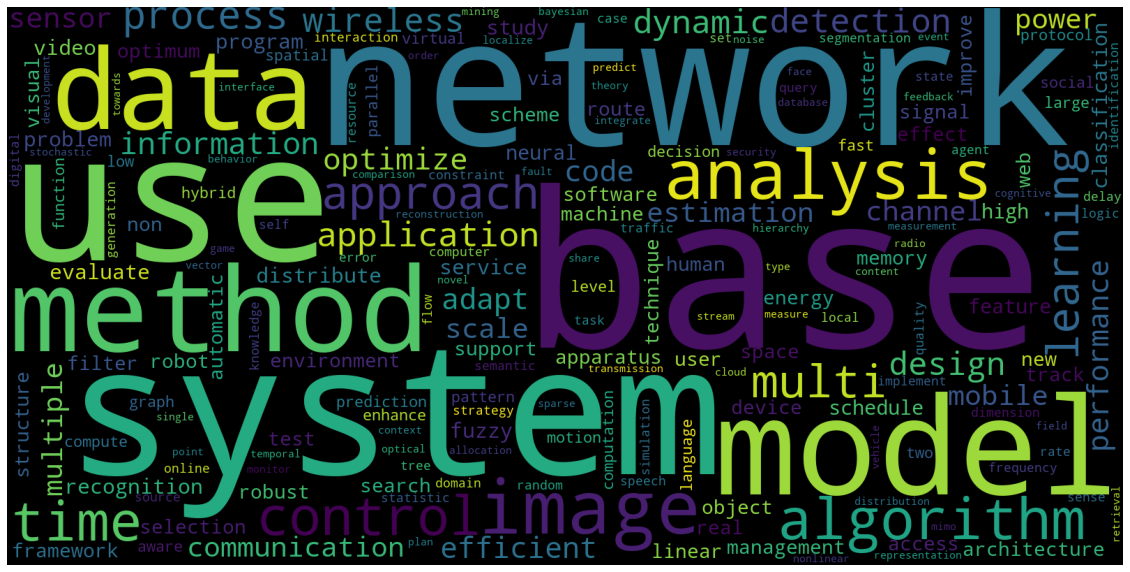

In [ ]:
#visualizzo i risultati ottenuti dei titoli con una wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

from wordcloud import WordCloud

flat_list = [item for sublist in dfquery["stop_query_wnlem"] for item in sublist] #lista contenente i token 
  
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="black").generate_from_frequencies(Counter(flat_list))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

In [ ]:
#riconduco token a testo
dfquery['stop_query'] = dfquery['stop_tok_query'].apply(lambda x: ' '.join(x))
dfquery['wnlem_query'] = dfquery['stop_query_wnlem'].apply(lambda x: ' '.join(x))
#rimuovo colonne non necessarie
dfquery.drop('query_tokens', axis=1, inplace=True)
dfquery.drop('stop_tok_query', axis=1, inplace=True)
dfquery.drop('stop_query_wnlem', axis=1, inplace=True)

In [ ]:
dfquery

,qid,query,clean_query,stop_query,wnlem_query
0,2477357073,survey application layer protocol internet things,survey application layer protocol internet things,survey application layer protocol internet things,survey application layer protocol internet thing
1,589973208,interference alignment game theoretical power ...,interference alignment game theoretical power ...,interference alignment game theoretical power ...,interference alignment game theoretical power ...
2,2150088023,reliable wireless broadcast random network cod...,reliable wireless broadcast random network cod...,reliable wireless broadcast random network cod...,reliable wireless broadcast random network cod...
3,2161089462,investigate tourist pattern obligation protect...,investigate tourist pattern obligation protect...,investigate tourist pattern obligation protect...,investigate tourist pattern obligation protect...
4,2157836986,automatic inference structural change matching...,automatic inference structural change matching...,automatic inference structural change matching...,automatic inference structural change matching...
...,...,...,...,...,...
552793,2104456054,maintenance policy selection manufacture firm ...,maintenance policy selection manufacture firm ...,maintenance policy selection manufacture firm ...,maintenance policy selection manufacture firm ...
552794,2145299863,closed form solution attitude speed determinat...,closed form solution attitude speed determinat...,closed form solution attitude speed determinat...,closed form solution attitude speed determinat...
552795,2070792843,artificial language learning feature base gene...,artificial language learning feature base gene...,artificial language learning feature base gene...,artificial language learning feature base gene...
552796,1968248541,poster mimicry attack wireless link signature,poster mimicry attack wireless link signature,poster mimicry attack wireless link signature,poster mimicry attack wireless link signature


# FINE PREPROCESSING

In [ ]:
#esporto i dataframe in un csv
df.to_csv('/content/drive/MyDrive/Progetto_Information_Retrieval/df_preprocessed.csv', index=False)
dfquery.to_csv('/content/drive/MyDrive/Progetto_Information_Retrieval/df_query.csv', index=False)

In [ ]:
#riavvio runtime per avere più RAM
import os
os.kill(os.getpid(), 9)

In [ ]:
#collegamento al Drive e riprendo i df
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Progetto_Information_Retrieval/df_preprocessed.csv')
dfquery = pd.read_csv('/content/drive/MyDrive/Progetto_Information_Retrieval/df_query.csv')

# QRELS E PREDISPOSIZIONE DF


In [ ]:
!pip install json
!pip install jsonlines
import json
import jsonlines
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importo le qrels e le inserisco in un dataframe adatto agli esperimenti
qrels_path = "/content/drive/MyDrive/Progetto_Information_Retrieval/computer_science/test/qrels.json"
qrels = []

with open(qrels_path, "r") as corpusfile: 
    data = json.load(corpusfile)
    for qid, doc_dict in data.items():
        for docno, label in doc_dict.items():
            qrels.append((qid, docno, label))

qrelsdf = pd.DataFrame(qrels, columns=['docno', 'qid', 'label'])

In [ ]:
#predispongo il df delle qrels
qrelsdf['qid'] = qrelsdf['qid'].apply(str)
qrelsdf['docno'] = qrelsdf['docno'].apply(str)

In [ ]:
cols = list(qrelsdf.columns)
cols.pop(cols.index("qid"))
cols = ["qid"] + cols
qrelsdf = qrelsdf[cols]

In [ ]:
qrelsdf

,qid,docno,label
0,148230327,2013326020,1
1,1713128408,2013326020,1
2,2000566545,2013326020,1
3,2015145891,2013326020,1
4,2030639709,2013326020,1
...,...,...,...
108631,2567351292,2964288084,1
108632,2949977662,2964288084,1
108633,2951177125,2964288084,1
108634,2963351358,2964288084,1


In [ ]:
#predispongo df dei documenti all'indicizzazione
df['id'] = df['id'].apply(str)
df['wnlem_title'] = df['wnlem_title'].apply(str)
df['wnlem_text'] = df['wnlem_text'].apply(str)

df = df.rename(columns={'id': 'docno'})

#predispongo il df delle query
dfquery['qid'] = dfquery['qid'].apply(str)
dfquery['wnlem_query'] = dfquery['wnlem_query'].apply(str)

In [ ]:
#creo i df con i dati preprocessati per l'esperimento
#df dei documenti
df_wnlem = df[["docno","wnlem_title", "wnlem_text"]].copy()
df_wnlem.rename(columns={'wnlem_title': 'title', 'wnlem_text': 'text'}, inplace=True)

#df delle query
dfquery_wnlem = dfquery[["qid","wnlem_query"]].copy()
dfquery_wnlem.rename(columns={'wnlem_query': 'query'}, inplace=True)

# INDEXING E PYTERRIER MODEL TRAINING DI TUTTO IL DATASET COLLECTION

In [ ]:
!pip install python-terrier

In [ ]:
import pyterrier as pt

if not pt.started():
  pt.init()

import pandas as pd

PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



In [ ]:
import json
import pandas as pd

def msmarco_generate(): 
  with open('/content/drive/MyDrive/Progetto_Information_Retrieval/computer_science/collection.jsonl', "r") as corpusfile: 
      for l in corpusfile: 
        doc = json.loads(l) 
        text = json.loads(l) 
        yield {'docno' : doc['id'], 'text' : text['text']} 

iter_indexer = pt.IterDictIndexer("./fulldoc_index", meta={'docno': 20, 'text': 4096})
indexref3 = iter_indexer.index(msmarco_generate())

22:10:33.831 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (2184880930) - further warnings are suppressed
22:41:26.101 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 28 empty documents


In [ ]:
index_full_text = pt.IndexFactory.of(indexref3)

In [ ]:
print('Collection Statistics', index_full_text.getCollectionStatistics().toString())

Collection Statistics Number of documents: 4809684
Number of terms: 1020823
Number of postings: 255410235
Number of fields: 1
Number of tokens: 399565930
Field names: [text]
Positions:   false



In [ ]:
tfidf_1 = pt.BatchRetrieve(index_full_text, wmodel="TF_IDF", num_results = 20)
bm25_1 = pt.BatchRetrieve(index_full_text, wmodel="BM25", num_results = 20)

In [ ]:
#importo tutte le metriche
from pyterrier.measures import *
from pyterrier import Utils

In [ ]:
resultstfidf_1 = pt.Experiment(
    [tfidf_1],
    dfquery_wnlem,
    qrelsdf, 
    eval_metrics=[AP,P@10, P@20],
    names=["TF_IDF_1"]
)
display(resultstfidf_1)

In [ ]:
resultsbm25_1 = pt.Experiment(
    [bm25_1],
    dfquery_wnlem,
    qrelsdf, 
    eval_metrics=[AP,P@10, P@20],
    names=["BM25_1"]
)
display(resultsbm25_1)

In [ ]:
resultstfidf_1.to_csv('TFIDF_1_results.csv')
resultsbm25_1.to_csv('BM25_1_results.csv')

In [ ]:
import shutil

# Copiare il file CSV sul drive montato
shutil.copy('TFIDF_1_results.csv', '/content/drive/MyDrive/Progetto_Information_Retrieval/TFIDF_1_results.csv')
shutil.copy('BM25_1_results.csv', '/content/drive/MyDrive/Progetto_Information_Retrieval/BM25_1_results.csv')

# INDEXING E PYTERRIER MODEL TRAINING



In [ ]:
!pip install python-terrier

In [ ]:
import pyterrier as pt

if not pt.started():
  pt.init()

import pandas as pd

terrier-assemblies 5.7 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.7 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



In [ ]:
#creo indice utilizzando il titolo dei documenti
indexer = pt.DFIndexer("./index_document", overwrite=True, stopwords=None, stemmer = None )

#applico index al dataframe dei documenti preprocessati
indexer_wnlem_title = indexer.index(df_wnlem["title"], df_wnlem["docno"])

#applico index per i testi preprocessati
#indexer_wnlem_text = indexer.index(df_wnlem["text"], df_wnlem["docno"])

In [ ]:
#carico l'index del titolo per poterlo usare
index_wnlem_title = pt.IndexFactory.of(indexer_wnlem_title)

#carico index del testo
#index_wnlem_text = pt.IndexFactory.of(indexer_wnlem_text)

#visualizzo informazioni generali sull'indice
print(index_wnlem_title.getCollectionStatistics().toString())

Number of documents: 100000
Number of terms: 37146
Number of postings: 764215
Number of fields: 0
Number of tokens: 780675
Field names: []
Positions:   false



In [ ]:
#batchretrieve
#per settare il numero di risultati reperiti e ridurre costo computazionale setto num_results = 20
tfidf = pt.BatchRetrieve(index_wnlem_title, wmodel="TF_IDF", num_results= 20)
bm25 = pt.BatchRetrieve(index_wnlem_title, wmodel="BM25", num_results = 20)
#tfidf = pt.BatchRetrieve(index_wnlem_text, wmodel="TF_IDF", num_results= 20)
#bm25 = pt.BatchRetrieve(index_wnlem_text, wmodel="BM25", num_results = 20)

In [ ]:
tfidf.search("data")

,qid,docid,docno,rank,score,query
0,1,37947,2277355883,0,3.723440,data
1,1,53929,2277860176,1,3.661825,data
2,1,13060,1966924930,2,3.601665,data
3,1,7196,838458062,3,3.544249,data
4,1,11962,2014196286,4,3.544249,data
5,1,26306,1967354395,5,3.544249,data
6,1,39156,2277380952,6,3.544249,data
7,1,39285,2277386317,7,3.544249,data
8,1,60746,2075873452,8,3.544249,data
9,1,60999,2278186831,9,3.544249,data


# ESPERIMENTI

In [ ]:
#importo tutte le metriche
from pyterrier.measures import *
from pyterrier import Utils

In [ ]:
#creo un esperimento a cui passo il modello che ho creato prima, un dataframe di query con colonne id e testo, le qrels
# infine le metriche di valutazione
resultstfidf = pt.Experiment(
    [tfidf],
    dfquery_wnlem,
    qrelsdf,
    eval_metrics=[AP,P@10, P@20],
    names=["TF_IDF"]
)
display(resultstfidf)

,name,AP,P@10,P@20
0,TF_IDF,0.0,0.0,0.0


In [ ]:
resultsbm25 = pt.Experiment(
    [bm25],
    dfquery_wnlem,
    qrelsdf,
    eval_metrics=[AP,P@10, P@20],
    names=["BM25"]
)
display(resultsbm25)

,name,AP,P@10,P@20
0,BM25,0.0,0.0,0.0


In [ ]:
#salvo i risultati
resultstfidf.to_csv('TFIDF_results.csv')
resultsbm25.to_csv('BM25_results.csv')

In [ ]:
import shutil

# Copiare il file CSV sul drive montato
shutil.copy('TFIDF_results.csv', '/content/drive/MyDrive/Progetto_Information_Retrieval/TFIDF_results.csv')
shutil.copy('BM25_results.csv', '/content/drive/MyDrive/Progetto_Information_Retrieval/BM25_results.csv')

'/content/drive/MyDrive/Progetto_Information_Retrieval/BM25_results.csv'